In [1]:
!pip install fastbook #Menginstall package fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Package

In [22]:
import pandas as pd
import numpy as np
from fastbook import *
from fastai.vision import *

## Menampilkan Gambar

In [23]:
image = Image.open("/content/drive/MyDrive/image/bunga.jpeg")

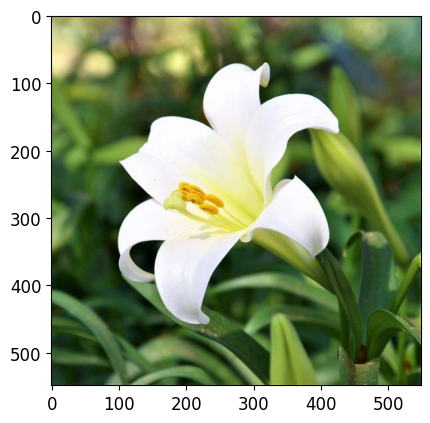

In [24]:
plt.imshow(image)
plt.show()

In [25]:
pixel_array = np.array(image)

print("Image Shape:", pixel_array.shape)

Image Shape: (549, 549, 3)


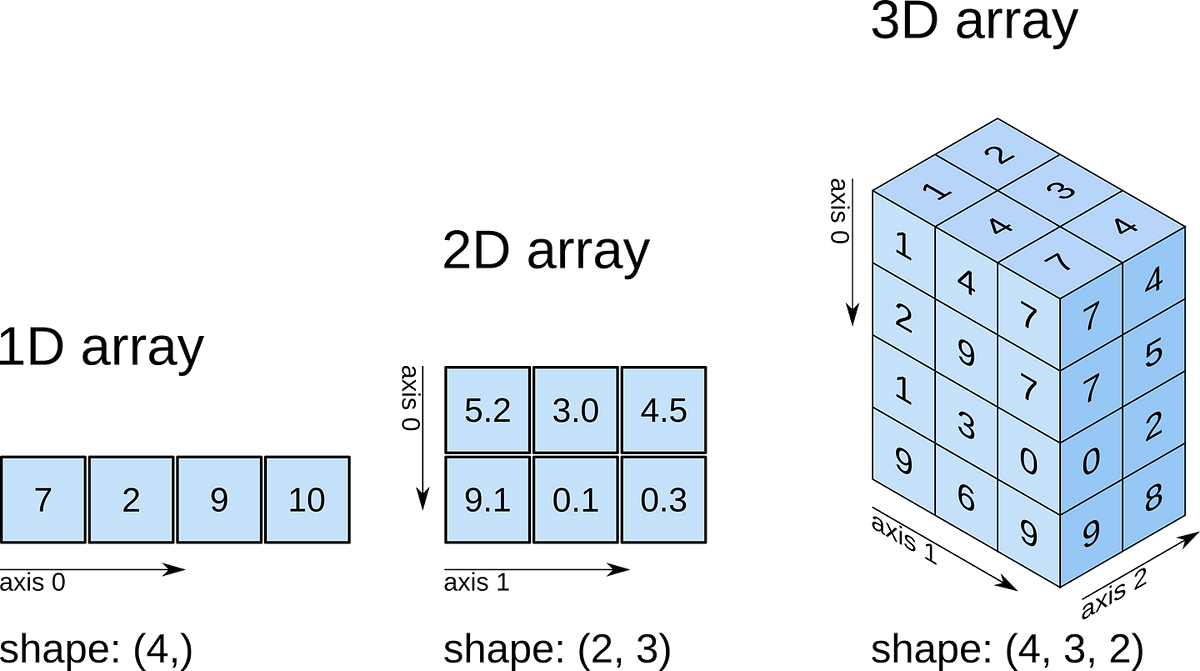

In [26]:
for row in range(pixel_array.shape[0]):
   for col in range(pixel_array.shape[1]):
       r, g, b = pixel_array[row, col]
       print(f"Pixel ({row}, {col}): R={r}, G={g}, B={b}")

Streaming output truncated to the last 5000 lines.
Pixel (539, 490): R=96, G=127, B=60
Pixel (539, 491): R=89, G=120, B=53
Pixel (539, 492): R=83, G=114, B=47
Pixel (539, 493): R=75, G=105, B=41
Pixel (539, 494): R=67, G=97, B=35
Pixel (539, 495): R=61, G=91, B=29
Pixel (539, 496): R=52, G=82, B=22
Pixel (539, 497): R=48, G=78, B=18
Pixel (539, 498): R=43, G=73, B=11
Pixel (539, 499): R=39, G=70, B=3
Pixel (539, 500): R=37, G=68, B=1
Pixel (539, 501): R=37, G=68, B=1
Pixel (539, 502): R=37, G=67, B=3
Pixel (539, 503): R=37, G=67, B=5
Pixel (539, 504): R=34, G=63, B=7
Pixel (539, 505): R=35, G=64, B=10
Pixel (539, 506): R=37, G=65, B=14
Pixel (539, 507): R=39, G=67, B=16
Pixel (539, 508): R=43, G=72, B=18
Pixel (539, 509): R=46, G=75, B=17
Pixel (539, 510): R=50, G=80, B=20
Pixel (539, 511): R=51, G=81, B=17
Pixel (539, 512): R=59, G=90, B=22
Pixel (539, 513): R=62, G=94, B=21
Pixel (539, 514): R=65, G=97, B=24
Pixel (539, 515): R=64, G=96, B=23
Pixel (539, 516): R=58, G=92, B=16
Pixel 

## Membuat Gambar Grayscale

Rumus untuk mengubah nilai RGB ke grayscale adalah
# NTSC: 0,2989 * R + 0,587 * G + 0,114 * B


In [27]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grayscale = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return grayscale

In [28]:
image_np = np.array(image)
grayscale_image = rgb2gray(image_np)
grayscale_image

array([[213.8299, 198.8314, 193.8319, ..., 135.2714, 136.2713, 133.2716],
       [198.8314, 183.8329, 177.8335, ..., 129.272 , 131.2718, 130.2719],
       [191.0602, 175.0618, 168.0625, ..., 125.2724, 128.2721, 128.913 ],
       ...,
       [ 48.6761,  49.676 ,  51.0349, ...,  41.1562,  44.1559,  46.1557],
       [ 48.6761,  49.676 ,  51.0349, ...,  43.156 ,  45.1558,  47.1556],
       [ 49.676 ,  49.676 ,  51.0349, ...,  44.9386,  45.9385,  46.9276]])

In [29]:
grayscale_image.shape

(549, 549)

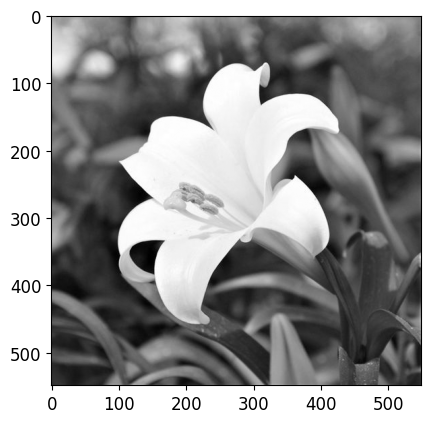

In [30]:
import matplotlib.pyplot as plt

plt.imshow(grayscale_image, cmap='gray')
plt.show()

## Membuat Normalisasi Gambar

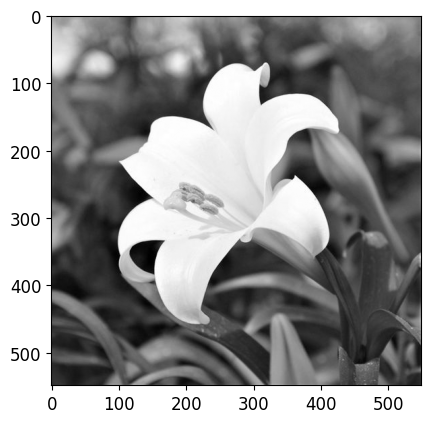

In [31]:
normalized_image = grayscale_image / 255.0

plt.imshow(normalized_image, cmap='gray')
plt.show()

In [32]:
normalized_image

array([[0.83854863, 0.77973098, 0.7601251 , ..., 0.53047608, 0.53439725, 0.52263373],
       [0.77973098, 0.72091333, 0.69738627, ..., 0.50694902, 0.51479137, 0.5108702 ],
       [0.74925569, 0.68651686, 0.65906863, ..., 0.49126431, 0.50302784, 0.50554118],
       ...,
       [0.19088667, 0.19480784, 0.20013686, ..., 0.16139686, 0.17316039, 0.18100275],
       [0.19088667, 0.19480784, 0.20013686, ..., 0.16923922, 0.17708157, 0.18492392],
       [0.19480784, 0.19480784, 0.20013686, ..., 0.1762298 , 0.18015098, 0.1840298 ]])

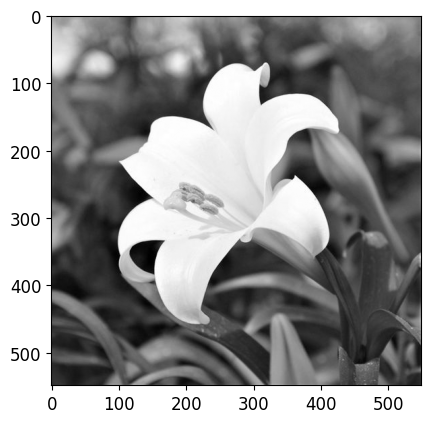

1.0


In [33]:
def normalize_sum_to_unity(image_array):
    """Normalizes an image array so that the sum of all pixel values is 1."""
    total = np.sum(image_array)
    if total == 0: # Avoid division by zero
        return image_array  # Or handle the case differently, like raising an exception
    return image_array / total

normalized_image_sum = normalize_sum_to_unity(grayscale_image)

plt.imshow(normalized_image_sum, cmap='gray')
plt.show()

print(np.sum(normalized_image_sum)) # Verify the sum is approximately 1
